In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

In [3]:
x_data = np.random.rand(100)

In [4]:
print(x_data)

[2.31021006e-01 6.53359771e-01 3.76480795e-01 8.53479419e-02
 2.53851624e-01 5.79608928e-01 2.43511533e-01 2.54889446e-01
 9.40160726e-01 2.13533078e-01 9.32385661e-01 2.01341589e-01
 9.19134556e-01 2.58928989e-01 4.88681956e-01 8.51131897e-01
 5.92101333e-01 1.67935865e-01 1.50968551e-01 5.21302433e-01
 7.27457488e-01 9.51687051e-01 9.01124708e-01 8.27443068e-01
 7.91802284e-01 4.86700771e-01 2.88489792e-02 3.09725746e-01
 5.18040572e-02 2.33891942e-01 4.95507482e-01 6.97838513e-01
 9.82013656e-02 2.11841747e-01 1.42324454e-01 3.88870594e-01
 9.97991504e-01 2.39766688e-01 9.99632115e-01 2.83001636e-01
 6.38111631e-01 8.81057421e-01 3.79931685e-01 9.05992058e-01
 8.24008906e-01 9.43357561e-01 2.31184182e-01 6.44321251e-01
 1.43306331e-01 7.92329203e-02 5.29348969e-04 7.15689923e-01
 7.07684903e-01 2.56648320e-01 8.16250526e-01 9.81539502e-01
 1.60464038e-01 4.29816017e-01 3.02029141e-01 8.91280214e-01
 3.20025162e-01 8.84485016e-01 7.98812991e-01 2.51204455e-01
 6.52109699e-01 3.624317

In [12]:
noise = np.random.normal(0,0.01,x_data.shape) #正态分布，参数分别表示均值，范围，shape

In [13]:
y_data = x_data*0.1 + 0.2 + noise

In [14]:
plt.scatter(x_data,y_data)

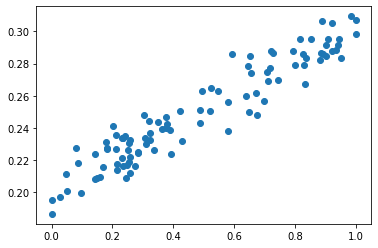

In [15]:
plt.show()

In [16]:
x_data = x_data.reshape(-1,1) #-1表示自动匹配多少行，1表示1列，所以产生一个100行1列的向量

In [18]:
y_data = y_data.reshape(-1,1)

In [19]:
#把numpy的数据类型转换成tensor类型

In [21]:
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)
inputs = Variable(x_data)
target = Variable(y_data)

In [33]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在__init__()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1,1)
        
    # 定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [34]:
# 定义模型
model = LinearRegression()
# 定义代价函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [37]:
#查看参数名字和数值（可看可不看）
for name, parameters in model.named_parameters():
    print('name:{},parameters:{}'.format(name,parameters))

name:fc.weight,parameters:Parameter containing:
tensor([[0.5054]], requires_grad=True)
name:fc.bias,parameters:Parameter containing:
tensor([-0.6077], requires_grad=True)


In [38]:
for i in range(1001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%200 == 0:
        print(i,loss.item())

0 0.39004120230674744
200 0.00024097904679365456
400 9.557315206620842e-05
600 9.499528096057475e-05
800 9.499299630988389e-05
1000 9.499297448201105e-05


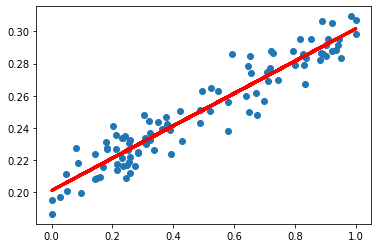

In [39]:
y_pred = model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=3)
plt.show()